In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets 
import matplotlib.pyplot as plt 
%matplotlib inline 






In [2]:
df = sns.load_dataset('iris')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train = df[['petal_length', 'petal_width']]

species_to_num = {'setosa' : 0,
                  'versicolor' : 1,
                  'virginica' : 2 }

df['species'] = df['species'].map(species_to_num)

y_train = df['species']

print(y_train)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=50)

c:\Users\dr_vi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


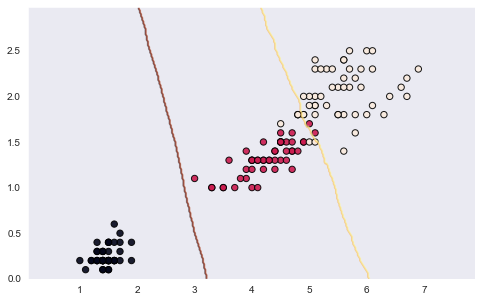

In [8]:
sns.set_style("dark")

Xv = X_train.values.reshape(-1, 1)

h = 0.02

x_min, x_max = Xv.min(), Xv.max() + 1

y_min, y_max = y_train.min(), y_train.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))


z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contour(xx, yy, z, cmap='afmhot', alpha=0.3, )

plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, alpha = 0.9, edgecolor ="k")
